In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.8'

# Introducción a las convnets: Clasificando números

Esta libreta contiene un ejemplo sencillo que podeis encontrar con mas detalle en el capítulo 5 del libro [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff).

----

Vamos a echarle un vistazo a un ejemplo sencillo de una convnet. La utilizaremos para clasificar el dataset MNIST, que es un dataset abierto que contiene números escritos a mano. 

![Números escritos a mano del dataset MNIST](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

Las 6 líneas de código que puedes ver aqui debajo muestran que aspecto tiene una convnet basica. Es una pila de capas `Conv2D` y `MaxPooling2D`. Veremos en un rato más concretamente lo que hacen. 
Lo importante es notar que una convnet toma como input tensores de tamaño `(altura_imagen, anchura_imagen, canales_imagen)`. 
En nuestro caso, vamos a configurar nuestra convnet para procesar inputs de tamaño `(28, 28, 1)`,  que es el formato de las imágenes MNIST. 
Por eso le pasamos el argumento input_shape=(28, 28, 1)` a nuestra primera capa.

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Vamos a ver que pinta tiene nuestra arquitectura hasta ahora:

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Puedes ver arriba que la salida de cada capa `Conv2D` y `MaxPooling2D` es un tensor 3D de dimensiones `(altura, anchura, canales)`. La anchura y la altura tienden a diminuir según vamos yendo mas profundo en la red. El número de canales está controlado por el primer argumento que se le pasa a 
las capas `Conv2D`  (e.j. 32 o 64).

El siguiente paso sería darle nuestro ultimo tensor (de dimensiones `(3, 3, 64)`) como entrada a una red densamente conectada. 
Estos clasificadores procesan vectores, que son 1D,  mientras que nuestra salida es un tensor 3D. 
Así que primero tendremos que aplanar nuestra salida 3D y convertirla en 1D y después añadir unas cuantas capas densas:

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Queremos clasificar 10 categorías, lo que significa que nuestra capa final debe tener 10 nodos y una función de activación softmax. Vamos a ver que pinta tiene nuestra red:

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

Como puedes ver, nuestra salida de dimension `(3, 3, 64)` han sido aplanadas hasta convertirse en vectores de dimensión `(576,)`, antes de entrar en las dos capas densas.

Vamos ahora a entrenar nuestra red con las imágenes del dataset MNIST. 


In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()




print("Shape del dataset de training antes de preprocesarlo: ", train_images.shape, "\n")

print ("Estas son las etiquetas de training: ", train_labels, "\n")

print ("Estas son las imágenes (matrices) de training: \n \n", train_images, "\n")

index=2
prueba=train_images[index][:][:]

import scipy.misc
scipy.misc.imsave('numbers/input.jpg', prueba)

from IPython.display import Image
Image("numbers/input.jpg")


Shape del dataset de training antes de preprocesarlo:  (60000, 28, 28) 

Estas son las etiquetas de training:  [5 0 4 ..., 5 6 8] 

Estas son las imágenes (matrices) de training: 
 
 [[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

print(train_labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels)
print("Shape del dataset de training después del preprocesado: ", train_images.shape)

[5 0 4 ..., 5 6 8]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
Shape del dataset de training después del preprocesado:  (60000, 28, 28, 1)


In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, validation_split=0.1, epochs=5, batch_size=64)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 61s - loss: 0.1830 - acc: 0.9431 - val_loss: 0.0576 - val_acc: 0.9840
Epoch 2/5
54000/54000 [==============================] - 61s - loss: 0.0506 - acc: 0.9839 - val_loss: 0.0354 - val_acc: 0.9895
Epoch 3/5
54000/54000 [==============================] - 61s - loss: 0.0359 - acc: 0.9890 - val_loss: 0.0312 - val_acc: 0.9917
Epoch 4/5
54000/54000 [==============================] - 61s - loss: 0.0260 - acc: 0.9919 - val_loss: 0.0284 - val_acc: 0.9913
Epoch 5/5
54000/54000 [==============================] - 60s - loss: 0.0203 - acc: 0.9935 - val_loss: 0.0335 - val_acc: 0.9918


Vamos a evaluar el modelo con las imágenes de test:

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

 9952/10000 [============================>.] - ETA: 0s

In [10]:
print("La precisión de nuestro test con una convnet básica es: " , test_acc*100, "% ¡No está mal!")

La precisión de nuestro test con una convnet básica es:  99.1 % ¡No está mal!


In [13]:
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt

img_width=28
img_height=28

img = image.load_img('siete.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
print("image shape", x.shape)
x = np.expand_dims(x, axis=0)
print("x shape", x.shape)

print("La imagen representa el número: ", model.predict_classes(x)[0])


image shape (28, 28, 1)
x shape (1, 28, 28, 1)
1/1 [==============================] - 0s
La imagen representa el número:  7


In [14]:
model.save('net_numbers.h5')

In [19]:
from keras.models import load_model
newmodel = load_model('net_numbers.h5')
print("La imagen representa el número: ", newmodel.predict_classes(x)[0])

1/1 [==============================] - 0s
La imagen representa el número:  7


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


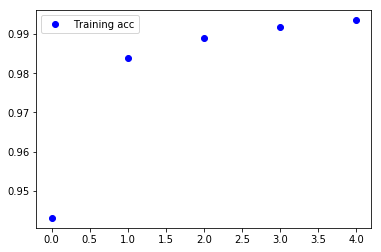

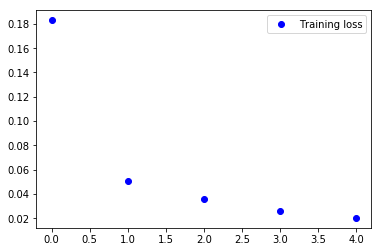

In [18]:
import matplotlib.pyplot as plt

print(history.history.keys())

acc = history.history['acc']
loss = history.history['loss']



epochs = range(len(acc))


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')

plt.legend()

plt.show()